In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [3]:
# import the data
path = "../data/"
files = [
    path + "180601_Customer_Info.csv",
    path + "180601_Referrals_Info.csv"
]
dfs = [pd.read_csv(file) for file in files]

In [5]:
df_customer, df_referrals = dfs[0], dfs[1]

In [6]:
df_customer.head()

,customer_id,sign_up_date,sign_up_channel
0,2543,2021-04-26,Price Comparison Website
1,2181,2021-07-24,Referral
2,2399,2020-10-11,Bulb Website
3,674,2021-04-04,Referral
4,2332,2021-09-05,Price Comparison Website


In [7]:
df_referrals.head()

,referral_date,referrer_customer_id,sign_up_customer_id
0,2021-07-18,795,1771
1,2021-04-12,577,1510
2,2021-07-07,868,1858
3,2021-10-25,801,1778
4,2021-08-15,690,1637


# explore referrals table

In [8]:
df_referrals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   referral_date         1000 non-null   object
 1   referrer_customer_id  1000 non-null   int64 
 2   sign_up_customer_id   1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB


In [11]:
# change date to datetime format
df_referrals["referral_date"] = pd.to_datetime(df_referrals["referral_date"])
df_referrals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   referral_date         1000 non-null   datetime64[ns]
 1   referrer_customer_id  1000 non-null   int64         
 2   sign_up_customer_id   1000 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 23.6 KB


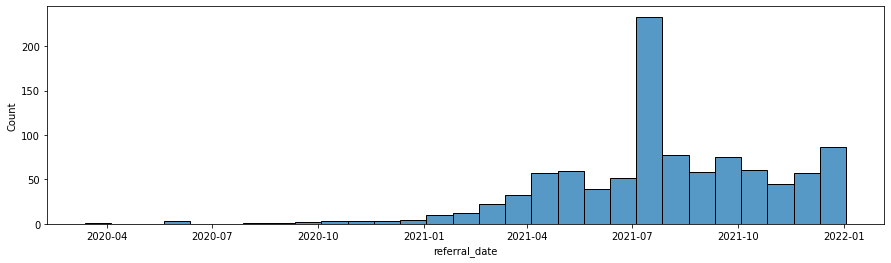

In [16]:
plt.figure(figsize=(15,4))
sns.histplot(data=df_referrals, x="referral_date");
# interesting: many referrals around 2021-07

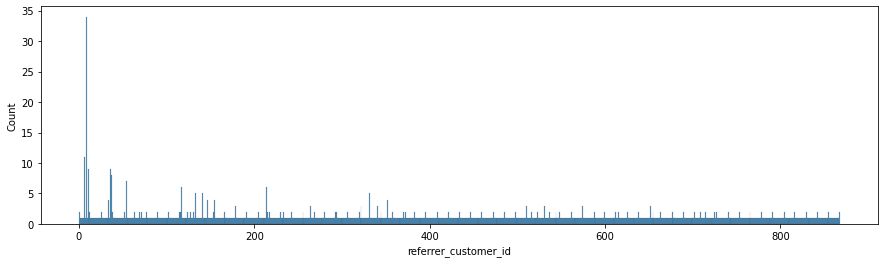

In [21]:
plt.figure(figsize=(15,4))
sns.histplot(data=df_referrals, x="referrer_customer_id", bins=800);
# interesting: some guy reffered more than 30 people

In [28]:
df_referrals_count = df_referrals.groupby(by="referrer_customer_id", as_index=False).count().drop(columns="sign_up_customer_id")\
.rename(columns={"referral_date" : "count"}).sort_values("count", ascending=False)
df_referrals_count.head()

,referrer_customer_id,count
8,8,34
6,6,11
36,36,9
10,10,9
37,37,8


In [31]:
df_referrals_count.groupby(by="count", as_index=False).count().sort_values("count", ascending=False)
# interesting: one guy referred 34 people, one referred 11 people
# but most people only refer one or two people only

,count,referrer_customer_id
10,34,1
9,11,1
8,9,2
7,8,1
6,7,1
5,6,2
4,5,1
3,4,6
2,3,4
1,2,19


In [34]:
# check if the table is clean
df_referrals.isna().sum()

referral_date           0
referrer_customer_id    0
sign_up_customer_id     0
dtype: int64

# explore customer table

In [32]:
df_customer.head()

,customer_id,sign_up_date,sign_up_channel
0,2543,2021-04-26,Price Comparison Website
1,2181,2021-07-24,Referral
2,2399,2020-10-11,Bulb Website
3,674,2021-04-04,Referral
4,2332,2021-09-05,Price Comparison Website


In [35]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      1699 non-null   int64 
 1   sign_up_date     1699 non-null   object
 2   sign_up_channel  1699 non-null   object
dtypes: int64(1), object(2)
memory usage: 39.9+ KB


In [36]:
# change date to datetime format
df_customer["sign_up_date"] = pd.to_datetime(df_customer["sign_up_date"])
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1699 non-null   int64         
 1   sign_up_date     1699 non-null   datetime64[ns]
 2   sign_up_channel  1699 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 39.9+ KB


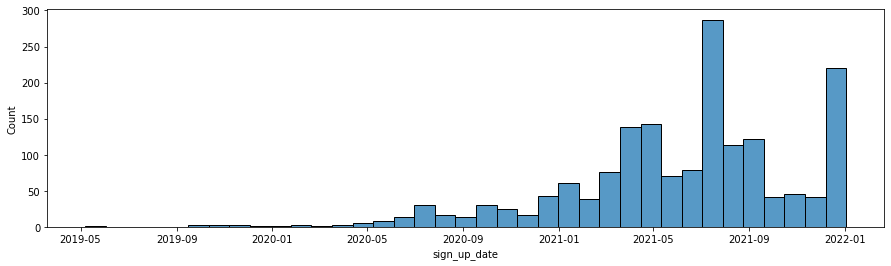

In [37]:
plt.figure(figsize=(15,4))
sns.histplot(data=df_customer, x="sign_up_date");

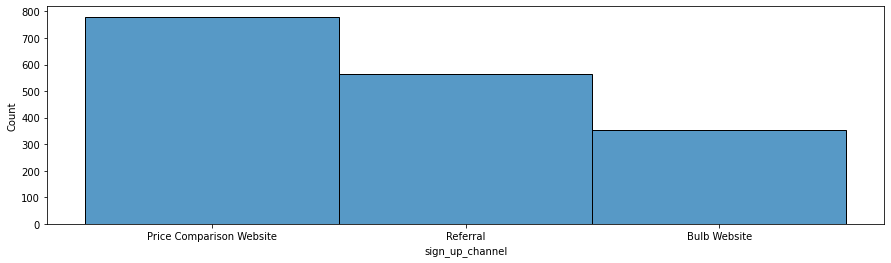

In [38]:
plt.figure(figsize=(15,4))
sns.histplot(data=df_customer, x="sign_up_channel");

In [48]:
# make sure that customer_id is unique
df_customer_count = df_customer.groupby(by="customer_id", as_index=False).count().drop(columns="sign_up_channel")\
.rename(columns={"sign_up_date" : "count"}).sort_values("count", ascending=False)
df_customer_count.head()

,customer_id,count
97,116,2
0,0,1
1129,2285,1
1140,2296,1
1139,2295,1


In [50]:
df_customer[df_customer["customer_id"] == 116]
# interesting: it's strange that customer 116 signed up twice

,customer_id,sign_up_date,sign_up_channel
53,116,2020-05-07,Price Comparison Website
1380,116,2020-10-27,Bulb Website


In [55]:
df_customer.shape

(1699, 3)

In [58]:
# let's keep only the first subscription for customer 116
# let's ignore that this customer probably left and came back, let's consider that he.she was stayed
df_customer = df_customer[df_customer.index != 1380]
df_customer.shape

(1698, 3)

In [59]:
# make sure that customer_id is now unique
df_customer_count = df_customer.groupby(by="customer_id", as_index=False).count().drop(columns="sign_up_channel")\
.rename(columns={"sign_up_date" : "count"}).sort_values("count", ascending=False)
df_customer_count.head()

,customer_id,count
0,0,1
1140,2296,1
1138,2294,1
1137,2293,1
1136,2292,1


In [60]:
df_customer.head()

,customer_id,sign_up_date,sign_up_channel
0,2543,2021-04-26,Price Comparison Website
1,2181,2021-07-24,Referral
2,2399,2020-10-11,Bulb Website
3,674,2021-04-04,Referral
4,2332,2021-09-05,Price Comparison Website


# merge both tables

In [61]:
df_referrals.head()

,referral_date,referrer_customer_id,sign_up_customer_id
0,2021-07-18,795,1771
1,2021-04-12,577,1510
2,2021-07-07,868,1858
3,2021-10-25,801,1778
4,2021-08-15,690,1637


In [62]:
df_customer.head()

,customer_id,sign_up_date,sign_up_channel
0,2543,2021-04-26,Price Comparison Website
1,2181,2021-07-24,Referral
2,2399,2020-10-11,Bulb Website
3,674,2021-04-04,Referral
4,2332,2021-09-05,Price Comparison Website


In [66]:
df_all = df_referrals.merge(right=df_customer, how="left", left_on="referrer_customer_id", right_on="customer_id")\
.drop(columns="customer_id").rename(columns={
    "sign_up_date" : "referrer_sign_up_date",
    "sign_up_channel" : "referrer_sign_up_channel"
})
df_all.head()

,referral_date,referrer_customer_id,sign_up_customer_id,referrer_sign_up_date,referrer_sign_up_channel
0,2021-07-18,795,1771,2021-03-03,Price Comparison Website
1,2021-04-12,577,1510,2021-03-28,Price Comparison Website
2,2021-07-07,868,1858,2021-03-07,Bulb Website
3,2021-10-25,801,1778,2021-04-30,Referral
4,2021-08-15,690,1637,2021-07-29,Price Comparison Website


In [67]:
df_all = df_all.merge(right=df_customer, how="left", left_on="sign_up_customer_id", right_on="customer_id")\
.drop(columns="customer_id").rename(columns={
    "sign_up_date" : "referree_sign_up_date",
    "sign_up_channel" : "referree_sign_up_channel"
})
df_all.head()

,referral_date,referrer_customer_id,sign_up_customer_id,referrer_sign_up_date,referrer_sign_up_channel,referree_sign_up_date,referree_sign_up_channel
0,2021-07-18,795,1771,2021-03-03,Price Comparison Website,NaT,NaN
1,2021-04-12,577,1510,2021-03-28,Price Comparison Website,NaT,NaN
2,2021-07-07,868,1858,2021-03-07,Bulb Website,NaT,NaN
3,2021-10-25,801,1778,2021-04-30,Referral,NaT,NaN
4,2021-08-15,690,1637,2021-07-29,Price Comparison Website,NaT,NaN


In [78]:
df_all.isna().sum() / len(df_all)
# problem: many referee missing from customer table

referral_date               0.000
referrer_customer_id        0.000
sign_up_customer_id         0.000
referrer_sign_up_date       0.170
referrer_sign_up_channel    0.170
referree_sign_up_date       0.988
referree_sign_up_channel    0.988
dtype: float64

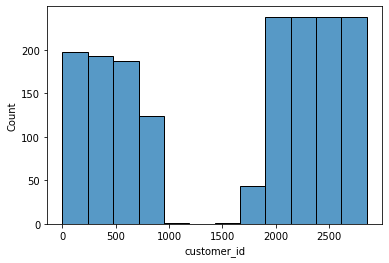

In [79]:
sns.histplot(data=df_customer, x="customer_id");
# there's a gap in the customer ids, it looks like we're missing customer ids

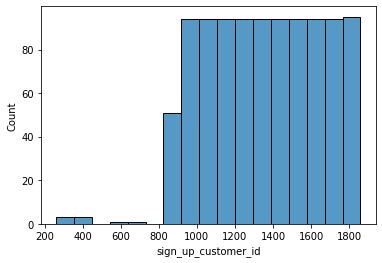

In [82]:
sns.histplot(data=df_referrals, x="sign_up_customer_id");

In [85]:
df_customer.head()

,customer_id,sign_up_date,sign_up_channel
0,2543,2021-04-26,Price Comparison Website
1,2181,2021-07-24,Referral
2,2399,2020-10-11,Bulb Website
3,674,2021-04-04,Referral
4,2332,2021-09-05,Price Comparison Website


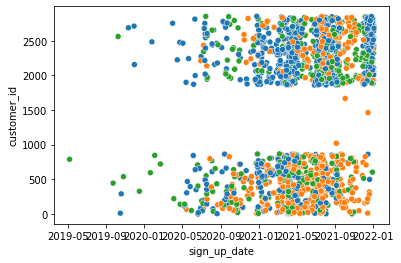

In [88]:
sns.scatterplot(data=df_customer, x="sign_up_date", y="customer_id", hue="sign_up_channel", legend=False);

In [89]:
(df_customer["customer_id"] > 1000).sum() / len(df_customer)

0.5871613663133097

In [91]:
(df_customer["customer_id"] > 1000).sum()

997

In [92]:
(df_customer["customer_id"] <= 1000).sum()

701

In [90]:
df_referrals.head()

,referral_date,referrer_customer_id,sign_up_customer_id
0,2021-07-18,795,1771
1,2021-04-12,577,1510
2,2021-07-07,868,1858
3,2021-10-25,801,1778
4,2021-08-15,690,1637


In [93]:
len(df_referrals.groupby(by="referrer_customer_id").count())

869

In [94]:
len(df_referrals.groupby(by="sign_up_customer_id").count())

1000

In [95]:
df_referrals.shape

(1000, 3)

# we don't know who the referees are (they're not in the customer table) but that's ok, it's not a key information for what we want to do. So let's merge both tables like this:

In [96]:
df_all = df_referrals.merge(right=df_customer, how="left", left_on="referrer_customer_id", right_on="customer_id")\
.drop(columns="customer_id").rename(columns={
    "sign_up_date" : "referrer_sign_up_date",
    "sign_up_channel" : "referrer_sign_up_channel"
})
df_all.head()

,referral_date,referrer_customer_id,sign_up_customer_id,referrer_sign_up_date,referrer_sign_up_channel
0,2021-07-18,795,1771,2021-03-03,Price Comparison Website
1,2021-04-12,577,1510,2021-03-28,Price Comparison Website
2,2021-07-07,868,1858,2021-03-07,Bulb Website
3,2021-10-25,801,1778,2021-04-30,Referral
4,2021-08-15,690,1637,2021-07-29,Price Comparison Website


In [100]:
df_all["duration_before_referal"] = df_all["referral_date"] - df_all["referrer_sign_up_date"]
df_all.head()

,referral_date,referrer_customer_id,sign_up_customer_id,referrer_sign_up_date,referrer_sign_up_channel,duration_before_referal
0,2021-07-18,795,1771,2021-03-03,Price Comparison Website,137 days
1,2021-04-12,577,1510,2021-03-28,Price Comparison Website,15 days
2,2021-07-07,868,1858,2021-03-07,Bulb Website,122 days
3,2021-10-25,801,1778,2021-04-30,Referral,178 days
4,2021-08-15,690,1637,2021-07-29,Price Comparison Website,17 days


In [103]:
df_all["days_before_referal"] = df_all["duration_before_referal"].dt.days
df_all.head()

,referral_date,referrer_customer_id,sign_up_customer_id,referrer_sign_up_date,referrer_sign_up_channel,duration_before_referal,days_before_referal
0,2021-07-18,795,1771,2021-03-03,Price Comparison Website,137 days,137.0
1,2021-04-12,577,1510,2021-03-28,Price Comparison Website,15 days,15.0
2,2021-07-07,868,1858,2021-03-07,Bulb Website,122 days,122.0
3,2021-10-25,801,1778,2021-04-30,Referral,178 days,178.0
4,2021-08-15,690,1637,2021-07-29,Price Comparison Website,17 days,17.0


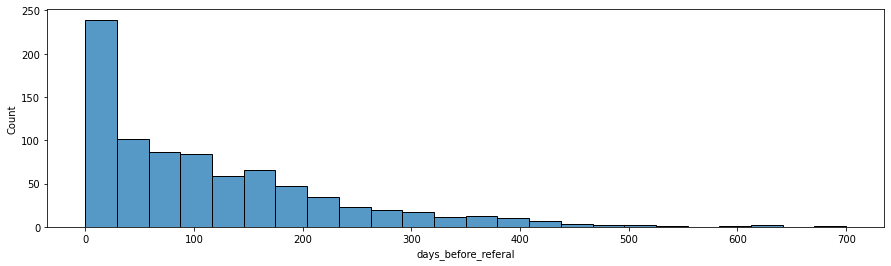

In [106]:
plt.figure(figsize=(15,4))
sns.histplot(data=df_all, x="days_before_referal");
# looks like people refer others as soon as they sign up

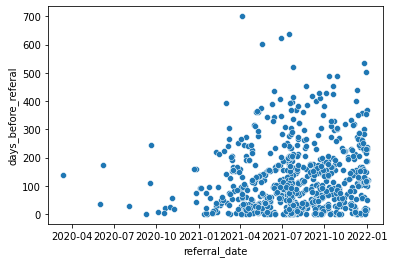

In [108]:
sns.scatterplot(data=df_all, x="referral_date", y="days_before_referal");

# Let's start answering questions

## When do members refer?

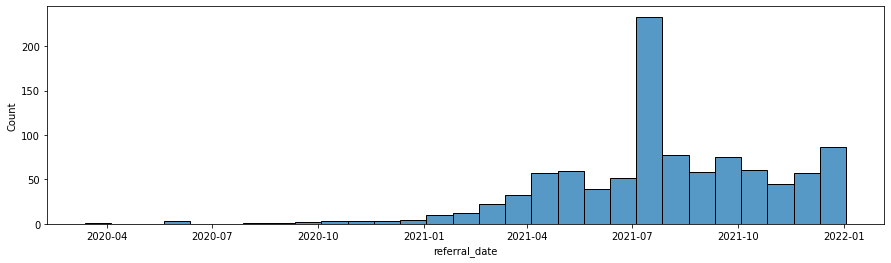

In [113]:
plt.figure(figsize=(15,4))
sns.histplot(data=df_all, x="referral_date");
# interesting: many referrals around 2021-07

In [127]:
df_all["referral_month"] = df_all["referral_date"].dt.month
df_all["referral_day"] = df_all["referral_date"].dt.day
df_all["referral_dayofweek"] = df_all["referral_date"].dt.dayofweek
df_all.head()

,referral_date,referrer_customer_id,sign_up_customer_id,referrer_sign_up_date,referrer_sign_up_channel,duration_before_referal,days_before_referal,referral_month,referral_day,referral_dayofweek
0,2021-07-18,795,1771,2021-03-03,Price Comparison Website,137 days,137.0,7,18,6
1,2021-04-12,577,1510,2021-03-28,Price Comparison Website,15 days,15.0,4,12,0
2,2021-07-07,868,1858,2021-03-07,Bulb Website,122 days,122.0,7,7,2
3,2021-10-25,801,1778,2021-04-30,Referral,178 days,178.0,10,25,0
4,2021-08-15,690,1637,2021-07-29,Price Comparison Website,17 days,17.0,8,15,6


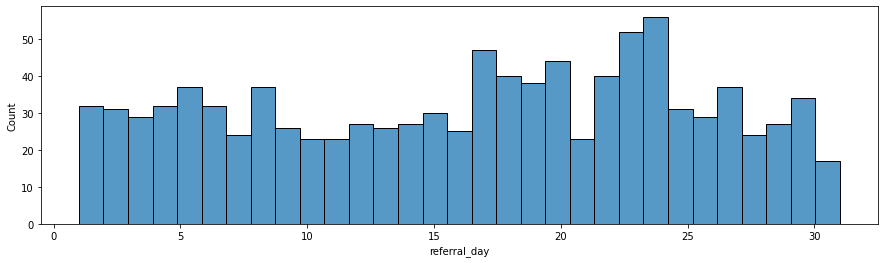

In [126]:
plt.figure(figsize=(15,4))
sns.histplot(data=df_all, x="referral_day", bins=31);

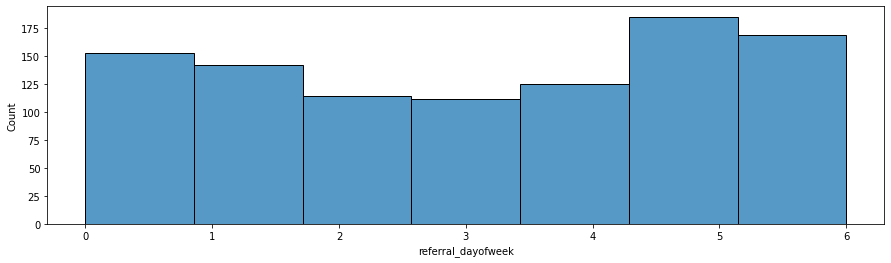

In [129]:
plt.figure(figsize=(15,4))
sns.histplot(data=df_all, x="referral_dayofweek", bins=7);

In [130]:
# My answer: members don't have a prefered time of the year to refer
# I'd ask around to know what happened in July 2021, was there a referal campain?

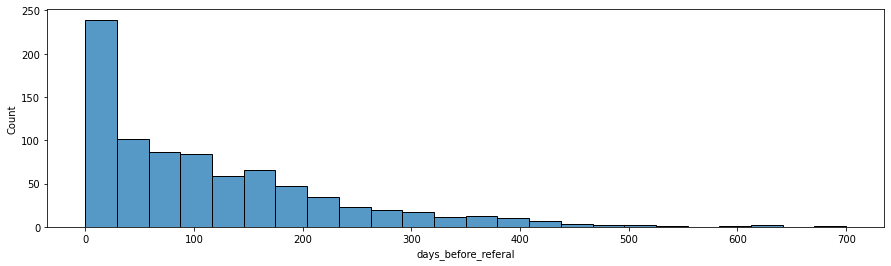

In [131]:
plt.figure(figsize=(15,4))
sns.histplot(data=df_all, x="days_before_referal");
# looks like people refer others as soon as they sign up

In [163]:
# let's see how many referral each user gave
# let's focus on the top 10 referrers
df_referrals_count.head(10)

,referrer_customer_id,count
8,8,34
6,6,11
36,36,9
10,10,9
37,37,8
54,54,7
214,214,6
117,117,6
133,133,5
332,332,4


In [164]:
top10_ids = df_referrals_count.head(10)["referrer_customer_id"].to_list()
top10_ids

[8, 6, 36, 10, 37, 54, 214, 117, 133, 332]

In [165]:
def is_top10(id):
    return id in top10_ids

df_top = df_all[df_all["referrer_customer_id"].apply(is_top10)]
df_top

,referral_date,referrer_customer_id,sign_up_customer_id,referrer_sign_up_date,referrer_sign_up_channel,duration_before_referal,days_before_referal,referral_month,referral_day,referral_dayofweek
9,2021-06-30,37,975,2021-03-14,Referral,108 days,108.0,6,30,2
18,2021-03-14,54,1167,2020-10-11,Referral,154 days,154.0,3,14,6
25,2021-06-25,10,425,2021-04-15,Referral,71 days,71.0,6,25,4
39,2021-11-17,332,1843,2021-07-18,Referral,122 days,122.0,11,17,2
49,2021-07-14,6,1034,2020-12-25,Referral,201 days,201.0,7,14,2
...,...,...,...,...,...,...,...,...,...,...
927,2021-04-10,6,875,2020-12-25,Referral,106 days,106.0,4,10,5
933,2021-05-09,214,1506,2020-07-19,Referral,294 days,294.0,5,9,6
976,2021-07-22,8,1199,2020-12-30,Bulb Website,204 days,204.0,7,22,3
978,2021-04-07,117,1640,2021-03-03,Referral,35 days,35.0,4,7,2


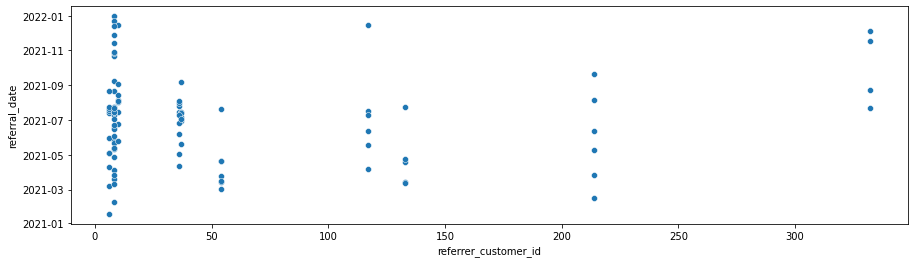

In [172]:
plt.figure(figsize=(15,4))
sns.scatterplot(data=df_top, x="referrer_customer_id", y="referral_date");
# the frequency at which people refer depends on people

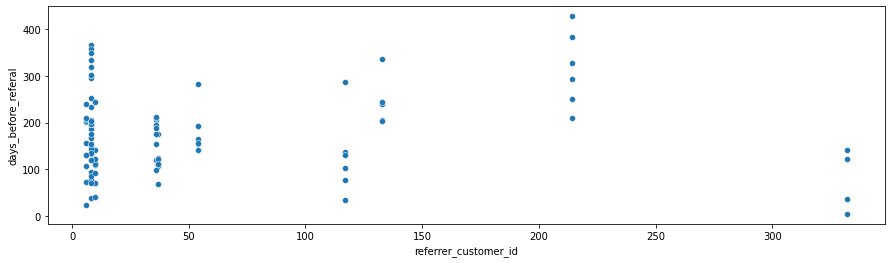

In [173]:
plt.figure(figsize=(15,4))
sns.scatterplot(data=df_top, x="referrer_customer_id", y="days_before_referal");
# some people don't start refering immediatly, maybe they didn't know about the referal program

In [178]:
df_all.head()

,referral_date,referrer_customer_id,sign_up_customer_id,referrer_sign_up_date,referrer_sign_up_channel,duration_before_referal,days_before_referal,referral_month,referral_day,referral_dayofweek
0,2021-07-18,795,1771,2021-03-03,Price Comparison Website,137 days,137.0,7,18,6
1,2021-04-12,577,1510,2021-03-28,Price Comparison Website,15 days,15.0,4,12,0
2,2021-07-07,868,1858,2021-03-07,Bulb Website,122 days,122.0,7,7,2
3,2021-10-25,801,1778,2021-04-30,Referral,178 days,178.0,10,25,0
4,2021-08-15,690,1637,2021-07-29,Price Comparison Website,17 days,17.0,8,15,6


In [182]:
df_min_day = df_all.groupby(by="referrer_customer_id", as_index=False).min()[["referrer_customer_id", "days_before_referal"]]
df_min_day.sort_values("days_before_referal", ascending=True, inplace=True)
df_min_day.head()

,referrer_customer_id,days_before_referal
191,191,0.0
29,29,0.0
615,615,0.0
250,250,0.0
613,613,0.0


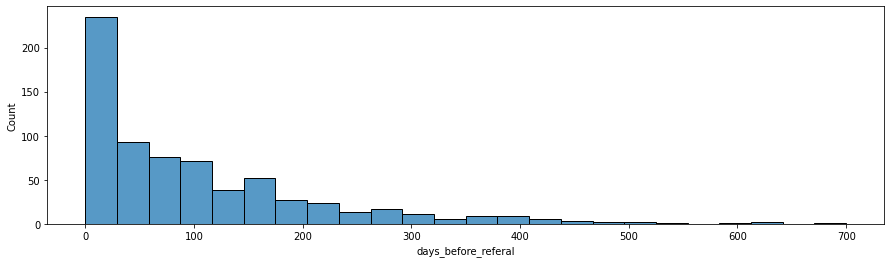

In [183]:
plt.figure(figsize=(15,4))
sns.histplot(data=df_min_day, x="days_before_referal");
# most people refer their friends immediately

## Does the channel members are acquired from​ ​ significantly​ ​ impact how they refer?

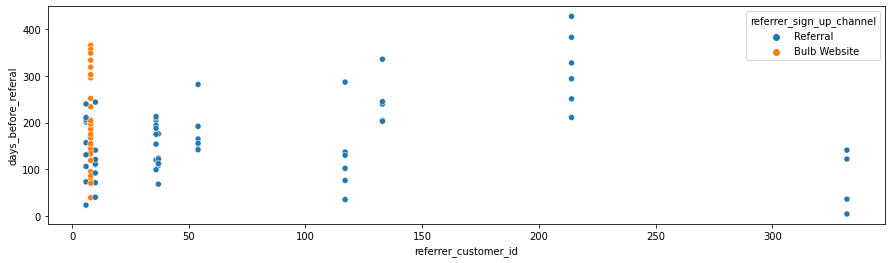

In [174]:
plt.figure(figsize=(15,4))
sns.scatterplot(data=df_top, x="referrer_customer_id", y="days_before_referal", hue="referrer_sign_up_channel");

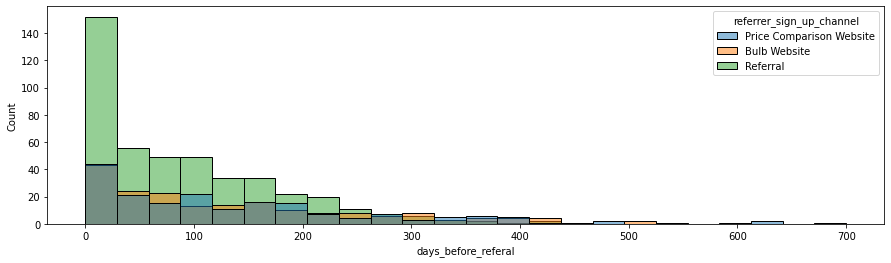

In [177]:
plt.figure(figsize=(15,4))
sns.histplot(data=df_all, x="days_before_referal", hue="referrer_sign_up_channel");
# it doesn't matter which channel they signed up from

In [193]:
mask = df_all["referrer_sign_up_channel"] != "Referral"
df_all[mask].sort_values("days_before_referal").head(30)
# people not comming from referal take more time to refer

,referral_date,referrer_customer_id,sign_up_customer_id,referrer_sign_up_date,referrer_sign_up_channel,duration_before_referal,days_before_referal,referral_month,referral_day,referral_dayofweek
44,2021-10-25,383,1284,2021-10-25,Bulb Website,0 days,0.0,10,25,0
546,2021-07-24,225,1112,2021-07-24,Bulb Website,0 days,0.0,7,24,5
862,2021-12-29,604,1540,2021-12-29,Bulb Website,0 days,0.0,12,29,2
138,2021-08-23,280,1169,2021-08-23,Bulb Website,0 days,0.0,8,23,0
366,2021-10-30,29,901,2021-10-30,Bulb Website,0 days,0.0,10,30,5
845,2021-10-13,348,1245,2021-10-13,Bulb Website,0 days,0.0,10,13,2
696,2021-08-02,43,916,2021-08-02,Bulb Website,0 days,0.0,8,2,0
19,2021-05-30,191,1071,2021-05-30,Price Comparison Website,0 days,0.0,5,30,6
252,2021-01-13,761,1729,2021-01-13,Bulb Website,0 days,0.0,1,13,2
157,2021-07-21,802,1779,2021-07-20,Price Comparison Website,1 days,1.0,7,21,2


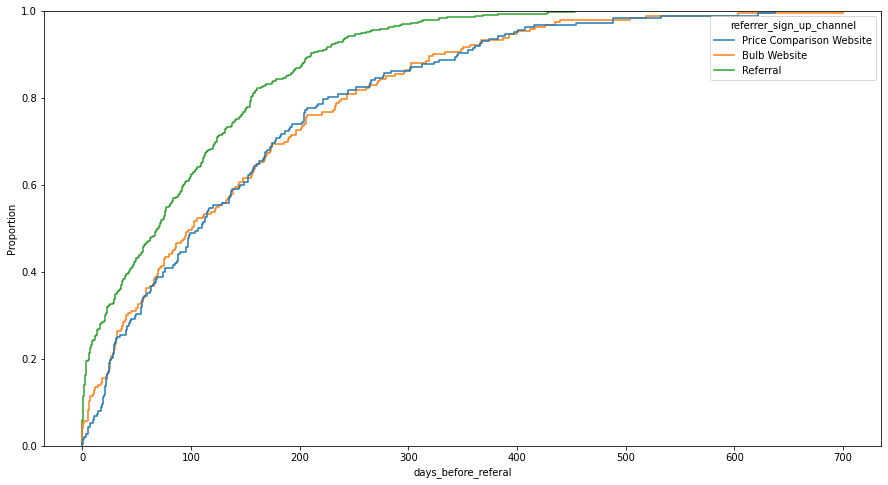

In [196]:
plt.figure(figsize=(15,8))
sns.ecdfplot(data=df_all, x="days_before_referal", hue="referrer_sign_up_channel");
# people not comming from referal take more time to refer

## We can send an email to members to invite them to refer their friends. To whom and when?

In [197]:
# 1) to the people not coming from referal, immediately after they sign up
# 2) to all people who didn't refer a friend yet after 90 days